In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr


# Configure NumPy.
np.random.seed(42)

# Configure Seaborn.
sns.set_style("whitegrid")
sns.set_palette("deep")

## Covariance

1. Covariance quantifies the relationship between two Numerical variables.
2. Covariance tries to identify the trend between two Numerical variables.
    1. Case 1: When Variable 1 increases Variable 2 is also increasing.
    2. Case 2: When Variable 1 increases Variable 2 is decreasing.

1. Pearson correlation coefficient
2. Spearman's rank correlation coefficient

1. Pearson correlation for linear correlation.
2. Spearman's rank correlation coefficient for non-linear correlation.

In [2]:
st_df = pd.read_csv("../0_data/01_students/weight-height.csv")
st_df.head(3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Scatterplot

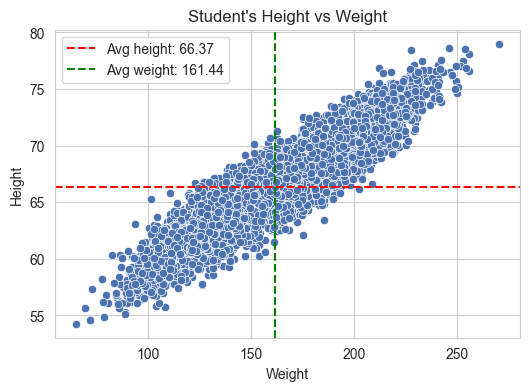

In [3]:
avg_height = round(st_df["Height"].mean(), 2)
avg_weight = round(st_df["Weight"].mean(), 2)

plt.figure(figsize=(6, 4))

sns.scatterplot(data=st_df, x="Weight", y="Height")
plt.title("Student's Height vs Weight")
plt.axhline(y=avg_height, color="r", linestyle="--", label=f"Avg height: {avg_height}")
plt.axvline(x=avg_weight, color="g", linestyle="--", label=f"Avg weight: {avg_weight}")
plt.legend()

plt.show()

### Issue with Covariance

In [4]:
print((65 - 60), "*", (75 - 70), "=", (65 - 60) * (75 - 70))

5 * 5 = 25


In [5]:
[(65 * 2.2, 75 * 2.5), (60 * 2.2, 70 * 2.5)]

[(143.0, 187.5), (132.0, 175.0)]

In [6]:
print((143 - 132), "*", (187.5 - 175.0), "=", (143 - 132) * (187.5 - 175.0))

11 * 12.5 = 137.5


## Correlation

1. Covariance can range between $[-\infty, +\infty]$
2. Correlation is Covariance scaled between $[-1, +1]$

Divide by Standard deviation -> Normalized -> Unit-less

Examples:

1. Correlation value +0.9 implies **Strong positive** relationship between numeric variables.
2. Correlation value +0.3 implies **Weak positive** relationship between numeric variables.
3. Correlation value 0 implies **NO correlation** relationship between numeric variables.
4. Correlation value -0.3 implies **Weak negative** relationship between numeric variables.
5. Correlation value -1.0 implies **Strong negative** relationship between numeric variables.

### Pearson Correlation Coefficient

1. Pearson Correlation Coefficient ranges between $[-1, +1]$

In [7]:
pea_cmat = st_df.corr(numeric_only=True)
pea_cmat

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


#### Heatmap

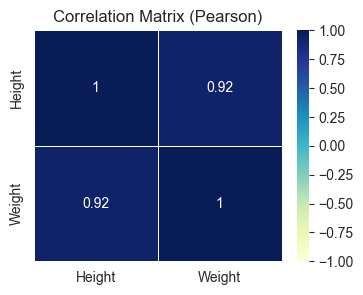

In [8]:
plt.figure(figsize=(4, 3))

sns.heatmap(pea_cmat, cmap="YlGnBu", linecolor="white", linewidth=0.5, vmin=-1, vmax=1, annot=True)
plt.title("Correlation Matrix (Pearson)")

plt.show()

#### Hypothesis testing

In [53]:
# H_0: There is NO linear relationship between the two variables
# H_a: There is some linear relationship between the two variables

In [10]:
alpha = 0.05

In [11]:
p_corr, p_value = pearsonr(x=st_df["Weight"], y=st_df["Height"], alternative="two-sided")
print("Correlation:", p_corr)
print("p-value:", p_value)

Correlation: 0.9247562987409146
p-value: 0.0


In [12]:
if p_value < alpha:
    print("Reject Null hypothesis")
else:
    print("Failed to reject Null hypothesis")

Reject Null hypothesis


> **Note**:
>
> Pearson correlation coefficient fails to capture Non-Linear relationships.

### Linear vs Nonlinear Relationships

![linear_vs_non_linear_relationships](images/linear_vs_non_linear_relationships.png)

### Spearman's rank correlation coefficient

1. Spearman's rank correlation coefficient ranges between $[-1, +1]$

In [13]:
spm_cmat = st_df.corr(numeric_only=True, method="spearman")
spm_cmat

,Height,Weight
Height,1.000000,0.925708
Weight,0.925708,1.000000


#### Heatmap

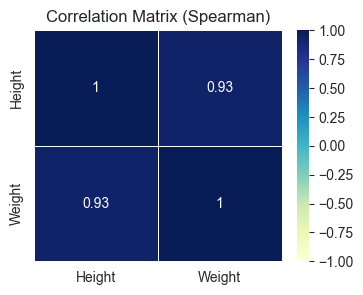

In [14]:
plt.figure(figsize=(4, 3))

sns.heatmap(spm_cmat, cmap="YlGnBu", linecolor="white", linewidth=0.5, vmin=-1, vmax=1, annot=True)
plt.title("Correlation Matrix (Spearman)")

plt.show()

#### Hypothesis testing

In [52]:
# H_0: There is NO relationship between the two variables
# H_a: There is some relationship between the two variables

In [16]:
alpha = 0.05

In [17]:
s_corr, p_value = spearmanr(a=st_df["Weight"], b=st_df["Height"], alternative="two-sided")
print("Correlation:", s_corr)
print("p-value:", p_value)

Correlation: 0.9257076644210767
p-value: 0.0


In [18]:
if p_value < alpha:
    print("Reject Null hypothesis")
else:
    print("Failed to reject Null hypothesis")

Reject Null hypothesis


In [20]:
cn_df = pd.read_csv("../0_data/04_concrete_data/concrete_data.csv")
cn_df.head(3)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


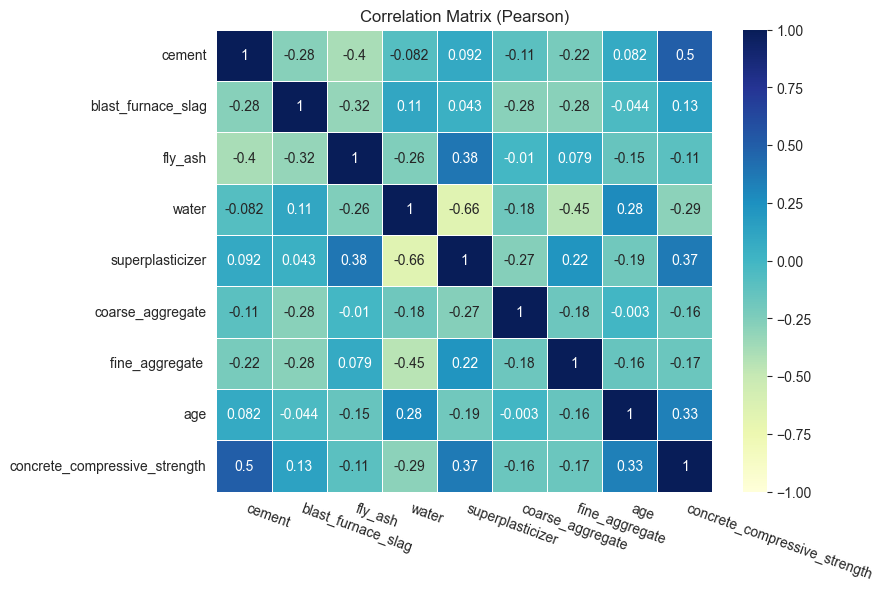

In [49]:
pea_cmat = cn_df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(pea_cmat, cmap="YlGnBu", linecolor="white", linewidth=0.5, vmin=-1, vmax=1, annot=True)
plt.title("Correlation Matrix (Pearson)")
plt.xticks(rotation=-20, ha="left")
plt.show()

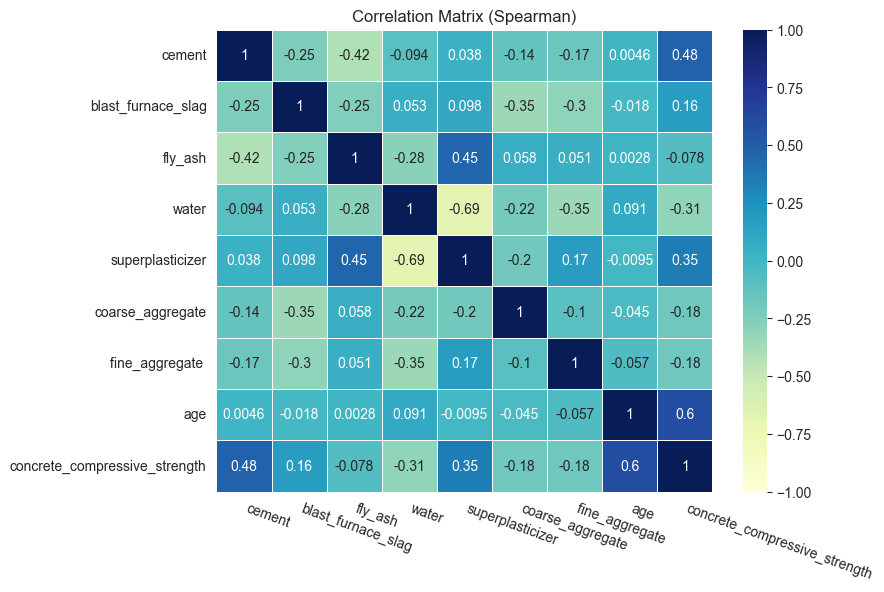

In [47]:
spm_cmat = cn_df.corr(numeric_only=True, method="spearman")

plt.figure(figsize=(8, 6))
sns.heatmap(spm_cmat, cmap="YlGnBu", linecolor="white", linewidth=0.5, vmin=-1, vmax=1, annot=True)
plt.title("Correlation Matrix (Spearman)")
plt.xticks(rotation=-20, ha="left")
plt.show()

In [51]:
study_hours = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])  
exam_scores = np.array([60, 65, 70, 75, 80, 85, 90, 95, 100, 105])

p_corr, p_value = pearsonr(x=study_hours, y=exam_scores, alternative="two-sided")
print("Correlation:", p_corr)
print("p-value:", p_value)

Correlation: 0.9999999999999998
p-value: 1.0635035875250968e-62
